## **Prediction using Unsupervised ML**
### **K-MEANS CLUSTERING**
In this task we will predict the optimum number of clusters and represent it visually.

This is a simple K-Means clustering task using Python.

In [13]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [14]:
# Import the data
iris = pd.read_csv('./Iris.csv')
# View the top 5 rows of df
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Now inspect the dimensions 
iris.shape

(150, 6)

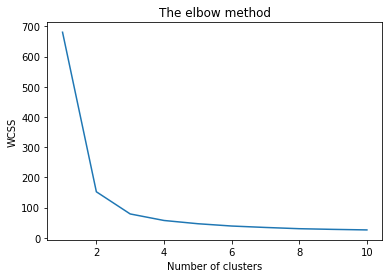

In [16]:
import warnings
warnings.filterwarnings('ignore')

x = iris.iloc[:, [1, 2, 3, 4]].values

# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [17]:
#Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [18]:
#filtering rows of original data
label1 = x[y_kmeans == 0, 0], x[y_kmeans == 0, 1]
label2 = x[y_kmeans == 1, 0], x[y_kmeans == 1, 1]
label3 = x[y_kmeans == 2, 0], x[y_kmeans == 2, 1]

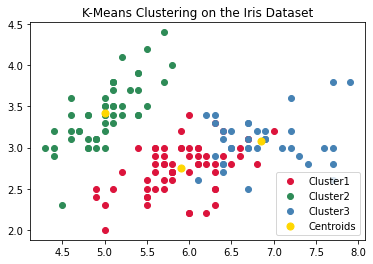

In [19]:
#Plotting the results
plt.scatter(label1[0] , label1[1] , color = 'crimson', label = 'Cluster1')
plt.scatter(label2[0] , label2[1] , color = 'seagreen', label = 'Cluster2')
plt.scatter(label3[0] , label3[1] , color = 'steelblue', label = 'Cluster3')
plt.legend()
plt.title('K-Means Clustering on the Iris Dataset')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'gold', label = 'Centroids')

plt.legend()

The optimal number of clusters is 3.